Parcial 2015 ejercicio5

Un vehículo de dos etapas emplea un propulsante sólido para el primer escalon de 260s de Isp1, y un propulsante liquido de 395s para el motor del segundo escalón, los factores estructurales de cada escalón son constantes de valores 0,20 y 0,15. Calcúlese la masa de propulsante requerida para cada etapa de manera que la relación X, masa inicial a masa carga útil sea mínima, optimizando los valores de las relaciones x1 y x2 de cada escalón. Se quiere inyectar una carga útil de 170kg en órbita, con un incremento de velocidad total de 9,8km/s (incluyendo en este valor las pérdidas por gravedad y resistencia aerodinámica, así como el incremento debido a la rotación de la Tierra en el lanzamiento, g0=9.81m/s**2)


In [1]:
#primero importamos
import numpy as np
#importar numpy para calculo numérico
from sympy import *
#importar sympy para calculo simbolico
init_printing(use_latex=True)
#importar optimize para resolver numericamente 
from scipy import optimize

In [2]:
#declaramos variables
#Ispn Impulso específico [s]
Isp1 = symbols('Isp1')
Isp2 = symbols('Isp2')
Isp3 = symbols('Isp2')
#σi factor estructural [adimensional]
o1 = symbols('o1')
o2 = symbols('o2')
o3 = symbols('o3')
#xi relaciones másicas [adimensional] x1=m01/m02 x2=m02/mo3 x3=m03/mpl
x1 = symbols('x1')
x2 = symbols('x2')
x3 = symbols('x3')
#X relación másica misil [adimensional]
X = symbols('X')
#masa carga util (pay load) mpl [kg]
mpl = symbols('mpl')
#incremento total de velocidad [m/s]
VIexpresion = Function('VI')(x1)
#VIdato = symbols('VIdato')
#mi masa etapa [kg]
m1 = symbols('m1')
m2 = symbols('m2')
m3 = symbols('m3')
#m0i masa inicial de etapa [kg]
m01 = symbols('m01')
m02 = symbols('m02')
m03 = symbols('m03')
#mpi masa propulsante etapa [kg] mpi=mi(1-σi)
mp1 = symbols('mp1')
mp2 = symbols('mp2')
mp3 = symbols('mp3')
#g0 gravedad g0=9,81m/s2
g0 = symbols('g0')
#cosas propias de los problemas en los que hay que calcular Vi
#altura h [m]
h = symbols('h')
#Radio de la tierra [m]
R = symbols('R')
#wt velocidad de rotacion de la tierra [rad/s]
wt = symbols('wt')
#mu constante gravitacional de la Tierra [mu]
mu = symbols('mu')
#Vorb Velocidad orbital [m/s]
Vorb = symbols('Vorb')
#Vrot Velocidad rotacion [m/s]
Vrot = symbols('Vrot')
#Vloss Velocidad de perdida [m/s]
Vloss = symbols('Vloss')

In [3]:
Vi=9800

Isp1=260
Isp2=395

mpl=170

o1=0.20
o2=0.15

g0=9.81

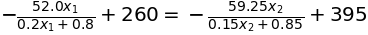

In [4]:
#Ecauciones que relacionan las etapas
f1=Eq(Isp1*(1-o1*(x1/(o1*x1+(1-o1)))),Isp2*(1-o2*(x2/(o2*x2+(1-o2)))))

f1

In [5]:
#hayamos relaciones entre las x
#el output de un solve es una lista de symbols, por eso debo guardar un elemento en una nueva variable
x2sol = solve(f1,x2)
x2=x2sol[0]
x2

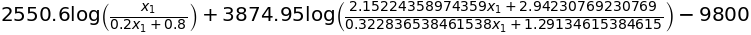

In [6]:
#definimos la ecuación de Vi (puesta para iteral)
f3=g0*(Isp1*log(x1/(o1*x1+(1-o1)))+Isp2*log(x2/(o2*x2+(1-o2))))-Vi
f3

In [7]:
#preparamos f3 para resolver numericamente
f3sol=lambdify(x1,f3)

In [8]:
#resolvemos iterando para x1
x1= optimize.newton(f3sol,1)

In [9]:
#print de soluciones y calculo de masas

#sustituyo el valor numerico de x1
x2=x2.subs('x1',x1)

X = x1*x2

m02=mpl*x2
m01=m02*x1

m1=m01-m02
m2=m02-mpl

mp1=m1*(1-o1)
mp2=m2*(1-o2)


print('x1=',x1,'   ','x2=',x2,'   ')
print('X=',X)
print('m01=',m01,'kg','   ','m02=',m02,'kg','   ')
print('m1=',m1,'kg','    ','m2=',m2,'kg','    ')
print('mp1=',mp1,'kg','   ','mp2=',mp2,'kg','    ')

x1= 10.067661146491792     x2= 24.6103668585552    
X= 247.768834222786
m01= 42120.7018178736 kg     m02= 4183.76236595439 kg    
m1= 37936.9394519192 kg      m2= 4013.76236595439 kg     
mp1= 30349.5515615354 kg     mp2= 3411.69801106123 kg     
